In [3]:
#Problem 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

In [2]:
survey=pd.read_csv('Survey-1.csv')
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [8]:
survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [4]:
survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [ ]:
#Gender and Major

In [5]:
pd.crosstab(index=survey['Gender'], columns=survey['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [ ]:
#Gender and Grad Intention

In [6]:
pd.crosstab(index=survey['Gender'], columns=survey['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [ ]:
#Gender and Employment

In [7]:
pd.crosstab(index=survey['Gender'], columns=survey['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [ ]:
#Gender and Computer

In [8]:
pd.crosstab(index=survey['Gender'], columns=survey['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [ ]:
#Gender and Grad Intention

In [9]:
pd.crosstab(index=survey['Gender'], columns=survey['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [10]:
#What is the probability that a randomly selected CMSU student will be male?

In [11]:
(29/62)*100

46.774193548387096

In [12]:
#What is the probability that a randomly selected CMSU student will be female?

In [13]:
(33/62)*100

53.2258064516129

In [14]:
#different majors among the male students in CMSU.

In [38]:
print ("Probability of Males opting for Accounting. is ",(4/29)*100)

Probability of Males opting for Accounting. is  13.793103448275861


In [41]:
print ("Probability of Males opting for CIS. is ",(1/29)*100)

Probability of Males opting for CIS. is  3.4482758620689653


In [42]:
print ("Probability of Males opting for Economics/Finance. is ",(4/29)*100)

Probability of Males opting for Economics/Finance. is  13.793103448275861


In [43]:
print ("Probability of Males opting for InternationalBusiness. is ",(2/29)*100)

Probability of Males opting for InternationalBusiness. is  6.896551724137931


In [44]:
print ("Probability of Males opting for Management. is ",(6/29)*100)

Probability of Males opting for Management. is  20.689655172413794


In [45]:
print ("Probability of Males opting for Other. is ",(4/29)*100)

Probability of Males opting for Other. is  13.793103448275861


In [46]:
print ("Probability of Males opting for Retailing/Marketing. is ",(5/29)*100)

Probability of Males opting for Retailing/Marketing. is  17.24137931034483


In [47]:
print(" Probability of Males opting for Undecided. is ",(3/29)*100 )

 Probability of Males opting for Undecided. is  10.344827586206897


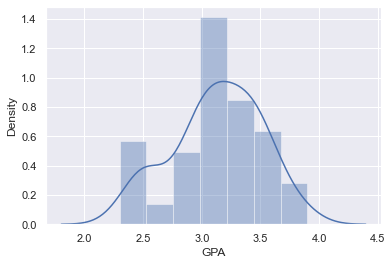

In [15]:
sns.distplot(survey['GPA']);

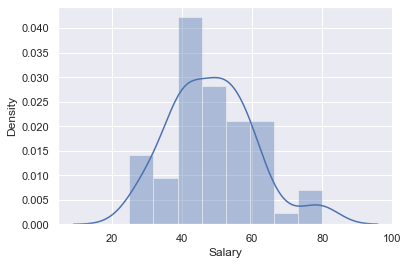

In [16]:
sns.distplot(survey['Salary']);

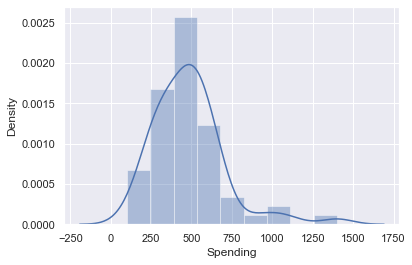

In [17]:
sns.distplot(survey['Spending']);

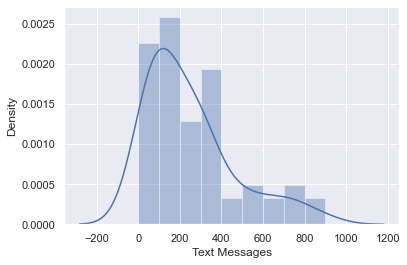

In [18]:
sns.distplot(survey['Text Messages']);

In [19]:
rng = np.random.default_rng()
x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.9939051866531372, pvalue=0.9361765384674072)

In [3]:
for i in survey.columns:
    if survey[i].dtypes != 'object':
        print("Shapiro results for", i)
        print(stats.shapiro(survey[i]))

Shapiro results for ID
ShapiroResult(statistic=0.9551758170127869, pvalue=0.023849833756685257)
Shapiro results for Age
ShapiroResult(statistic=0.9281195998191833, pvalue=0.0013503588270395994)
Shapiro results for GPA
ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)
Shapiro results for Salary
ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)
Shapiro results for Social Networking
ShapiroResult(statistic=0.8165903687477112, pvalue=2.546349548993021e-07)
Shapiro results for Satisfaction
ShapiroResult(statistic=0.8981330990791321, pvalue=8.741713827475905e-05)
Shapiro results for Spending
ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)
Shapiro results for Text Messages
ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)
